<a href="https://colab.research.google.com/github/Osstrinha/Osstrinha/blob/main/Lista_1_Fis_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]



c)


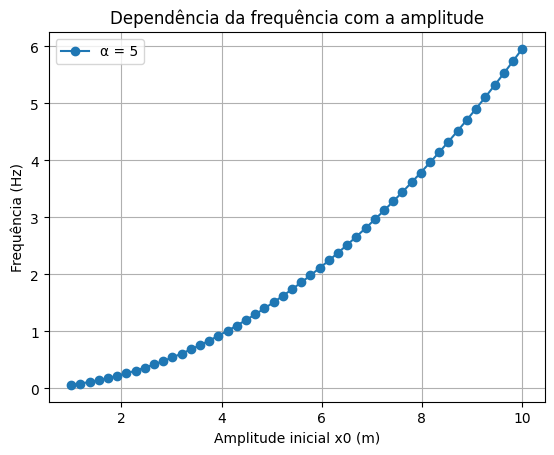


Exercício 10


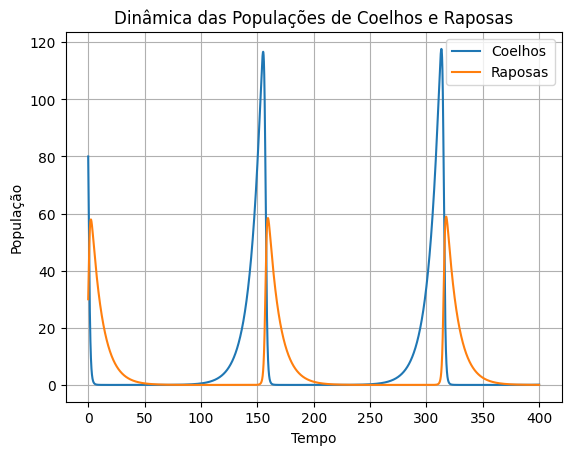

População máxima de coelhos: 117.65
População mínima de coelhos: 0.00
População máxima de raposas: 58.94
População mínima de raposas: 0.00
Nenhuma extinção detectada.

As extinções irão ocorrer para os seguintes parâmetros:
Coelhos extintos para gamma = 9.59 e beta = 0.01
Coelhos extintos para gamma = 10.00 e beta = 0.01
Coelhos extintos para gamma = 9.59 e beta = 0.05
Coelhos extintos para gamma = 10.00 e beta = 0.05
Coelhos extintos para gamma = 9.18 e beta = 0.09
Coelhos extintos para gamma = 9.59 e beta = 0.09
Coelhos extintos para gamma = 8.76 e beta = 0.13
Coelhos extintos para gamma = 10.00 e beta = 0.13
Coelhos extintos para gamma = 8.35 e beta = 0.18
Coelhos extintos para gamma = 9.59 e beta = 0.18
Coelhos extintos para gamma = 10.00 e beta = 0.18
Coelhos extintos para gamma = 9.18 e beta = 0.22
Coelhos extintos para gamma = 9.59 e beta = 0.22
Coelhos extintos para gamma = 10.00 e beta = 0.22
Coelhos extintos para gamma = 8.76 e beta = 0.26
Coelhos extintos para gamma = 9.18 e

In [26]:
import math

print("Exercício 1\na)")

true_gama = 0.57721566490153286060651209008240

import pandas as pd

pd.set_option("display.precision", 10)
pd.set_option("display.float_format", '{:.10f}'.format)


results = []
for n_max in [10, 100, 1000, 10000]:
    n = 1
    sum = 0
    while (n <= n_max):
        sum = sum + (1/n)
        n = n + 1
    gama = sum - math.log(n)
    diff_gama = true_gama - gama
    results.append([n_max, gama, diff_gama])

df = pd.DataFrame(results, columns=["n", "gamma", "difference"])
display(df)


print("b)\n")

tempo_espera = float(input("Quantos segundos está disposto a esperar para receber a resposta mais precisa? "))

import time

def calculate_gamma(n_max):
    n = 1
    sum = 0
    while (n <= n_max):
        sum = sum + (1/n)
        n = n + 1
    gama = sum - math.log(n)
    diff_gama = true_gama - gama
    return gama, diff_gama


start_time = time.time()
elapsed_time = 0
n_max = 10

results = []
while elapsed_time < tempo_espera: ## esperar tempo_espera segundos, caso não queira, basta reduzir esse número
    gama, diff_gama = calculate_gamma(n_max)
    results.append([n_max, gama, diff_gama])

    elapsed_time = time.time() - start_time
    n_max *= 2

df = pd.DataFrame(results, columns=["n", "gamma", "difference"])
display(df)


print("Exercício 2")

def calculate_sum(series_function, initial, tolerance=0.00001):
  sum_so_far = 0
  n = initial
  while True:
    term = series_function(n)
    sum_so_far += term
    if abs(term / sum_so_far) < tolerance:
      break
    n += 1
  return sum_so_far


def calculate_sum_stop(series_function, initial, limit):
  sum_so_far = 0
  n = initial
  while True:
    term = series_function(n)
    sum_so_far += term
    if n > limit:
      break
    n += 1
  return sum_so_far

print("a)")

def series_a(n):
  return 1/math.factorial(n)

sum_result = calculate_sum(series_a, 0)
print("a somatória é aproximadamente: ", sum_result)


print()
print("b)")

def series_b(n):
  return (-1)**n / (2*n + 1)


sum_result = 4*calculate_sum(series_b, 0)
print("a somatória é aproximadamente: ", sum_result)


print()
print("c)")

def series_c(n):
  return (2**n + 3*n + 1)

sum_result = calculate_sum_stop(series_c, 1, 10)
print("a somatória é aproximadamente: ", sum_result)


print()
print("d)")

def series_d(n):
  return 1/(n*(1+n))


sum_result = calculate_sum(series_d, 1)
print("a somatória é aproximadamente: ", sum_result)


print()
print("e)")

def series_e(n):
  return (2**n - 40*n)

sum_result = calculate_sum(series_e, 1, 10)
print("a somatória é aproximadamente: ", sum_result)



print()
print("Exercício 3")

def trapezoidal_rule(func, a, b, n):
  h = (b - a) / n
  result = 0.5 * (func(a) + func(b))
  for i in range(1, n):
    result += func(a + i * h)
  result *= h
  return result

def recursive_equation(tolerance=1e-6, max_iterations=100): ## Da pra ajustar esse maximo de iteracoes
  x_k = 5  ## Chute inicial
  for _ in range(max_iterations):
    integral_value = trapezoidal_rule(lambda y: math.exp(-y**2), 0, x_k, 1000)
    x_k_plus_1 = 5 - integral_value
    if abs(x_k_plus_1 - x_k) < tolerance:
      return x_k_plus_1
    x_k = x_k_plus_1
  return x_k

solution = recursive_equation()
print("A solução aproximada é", solution)

print()
print("Exercício 4")

import numpy as np
import matplotlib.pyplot as plt

def arcsin(x, num_terms=20):
  arcsin_approx = 0
  for n in range(num_terms):
    if n == 0:
      term = x
    else:
      term = math.factorial(2*n) * x**(2*n + 1) /(4**(n) * (math.factorial(n))**2 * (2*n + 1))
    arcsin_approx += term
  return arcsin_approx

x_values = np.linspace(-1, 1, 100)
arcsin_approx_values = [arcsin(x) for x in x_values]
arcsin_builtin_values = [math.asin(x) for x in x_values]


plt.plot(x_values, arcsin_approx_values, label="arcsin implementado")
plt.plot(x_values, arcsin_builtin_values, label="math.asin")
plt.xlabel("x")
plt.ylabel("arcsin(x)")
plt.title("Comparação entre aproximação e função intrínseca")
plt.legend()
plt.grid(True)
plt.show()


print()
print("Exercício 5")

def gauss_jacobi(A, b, tolerance=1e-6, max_iterations=100):
    n = A.shape[0]
    x = np.zeros(n)
    for _ in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            sum_term = 0
            for j in range(n):
                if i != j:
                    sum_term += A[i, j] * x[j]
            x_new[i] = (b[i] - sum_term) / A[i, i]
        if np.linalg.norm(x_new - x) < tolerance:
            return x_new
        x = x_new
    return x

print()
print("a)")
A = np.array([[10, 1, -1], [1, 10, 1], [2, -1, 10]])
b = np.array([10, 12, 11])
solution = gauss_jacobi(A, b)

print("Solução:")
print(solution)

print()
print("b)")

A = np.array([
    [16, 1, 1, 1, 1, 1, 1],
    [1, 18, 1, 1, 1, 1, 1],
    [1, 1, 20, 1, 1, 1, 1],
    [1, 1, 1, 22, 1, 1, 1],
    [1, 1, 1, 1, 24, 1, 1],
    [1, 1, 1, 1, 1, 26, 1],
    [1, 1, 1, 1, 1, 1, 28]
])
b = np.array([93, 102, 111, 120, 129, 138, 147, 156, 165, 174])
solution = gauss_jacobi(A, b)

print("Solução:")
print(solution)

print()
print("c)")

A = np.array([
    [31, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [2, 34, 2, 2, 2, 2, 2, 2, 2, 2],
    [2, 2, 37, 2, 2, 2, 2, 2, 2, 2],
    [2, 2, 2, 40, 2, 2, 2, 2, 2, 2],
    [2, 2, 2, 2, 43, 2, 2, 2, 2, 2],
    [2, 2, 2, 2, 2, 46, 2, 2, 2, 2],
    [2, 2, 2, 2, 2, 2, 49, 2, 2, 2],
    [2, 2, 2, 2, 2, 2, 2, 52, 2, 2],
    [2, 2, 2, 2, 2, 2, 2, 2, 55, 2],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 58]
])

b = np.array([93, 102, 111, 120, 129, 138, 147, 156, 165, 174])

solution = gauss_jacobi(A, b)

print("Solução:")
print(solution)

print()
print("Exercício 6")


A = np.zeros((10, 10))

for i in range(10): ## j+1 e i+1 pois inicializam em 0 e a matriz em 1
    for j in range(10):
        if i < j:
            A[i, j] = 2*(i+1) + 7*(j+1) + 2
        elif i == j:
            A[i, j] = (3*(i+1))**2
        else:
            A[i, j] = 4*((i+1)**3) + 5*((j+1)**2) + 1

b = np.array([37, 26, -9, -122, -107, -602, -257, -1606, -459, -3326])

print("A matriz formada fica:")
print()

augmented_matrix = np.column_stack((A, b))
display(pd.DataFrame(augmented_matrix))


print("A solução é:", np.linalg.solve(A, b))
print()

solution = gauss_jacobi(A, b)
print("Solução aproximada pelo método de gauss jacobi diverge, que para um máximo de 100 iterações dá:", solution)
print()

print("Exercício 7")

m = 0.7  # Massa (kg)
v0 = 100 * 1000 / 3600  # Velocidade inicial (m/s)
theta = 55 * np.pi / 180  # Ângulo (rad)
g = 9.8  # Aceleração da gravidade (m/s^2)
gamma = 0.8  # Coeficiente de resistência do ar (N.s/m)

# Condições iniciais
x0 = 0
y0 = 0
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)
dt = 0.01 ## passo do tempo

# Inicialização de vetores
t = [0]
x = [x0]
y = [y0]
vx = [vx0]
vy = [vy0]


while y[-1] >= 0:  ## Enquanto a altura for positiva
    v = np.sqrt(vx[-1]**2 + vy[-1]**2)
    Fx = -gamma * vx[-1]
    Fy = -gamma * vy[-1] - m * g

    ax = Fx / m
    ay = Fy / m


    vx.append(vx[-1] + ax * dt)
    vy.append(vy[-1] + ay * dt)
    x.append(x[-1] + vx[-1] * dt)
    y.append(y[-1] + vy[-1] * dt)
    t.append(t[-1] + dt)


## Plot
plt.plot(x, y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajetória do projétil (2D)")
plt.grid(True)
plt.show()

print()
print("a)", x[-1], "m")

print()
print("b)", v, "m/s")

print()
print("c)", np.amax(y), "m")

print()
print("d)", len(t)/100, "segundos")



print()
print("Exercício 8")


## Parametros
k = 1.0
m = 1.0
dt = 0.0001
tmax = 20.0
r0 = np.array([1.0, 0.0])
v0 = np.array([0.5, 1.0])

## Forca
def force(r, alpha):
  r_mag = np.linalg.norm(r)
  r_hat = r / r_mag  # Versor r
  return -k * (r_mag**alpha) * r_hat


## Simulacao
def simulate(alpha):
  t = 0.0
  r = r0.copy()
  v = v0.copy()
  positions = [r]

  while t < tmax:
    F = force(r, alpha)
    a = F / m
    v = v + a * dt
    r = r + v * dt
    positions.append(r)
    t += dt

  return np.array(positions)

## Plot
alphas = [2, 1, 0, -1, -2, -3]
for alpha in alphas:
  positions = simulate(alpha)
  plt.plot(positions[:, 0], positions[:, 1], label=("alpha =", alpha))

plt.xlabel("x")
plt.ylabel("y")
plt.title("Órbitas para diferentes valores de alpha")
plt.legend()
plt.grid(True)
plt.show()


print()
print("Exercício 9")


print()
print("a)")

## Parametros

k = 1.0
dt = 0.001
m = 1.0
tmax = 100.0
v0 = 0.0
alpha = 1

## Forca

def force(x, alpha):
  return -k* (x**alpha)

## Simulacao

def simulate_euler_cromer(x0, alpha):
  t = 0.0
  x = x0
  v = v0
  positions = [x]

  while t < tmax:
    F = force(x, alpha)
    a = F / m
    x = x + v0
    positions = [x]
    times = [t]

    while t < tmax:
      F = force(x, alpha)
      a = F / m
      v = v + a * dt
      x = x + v * dt
      positions.append(x)
      times.append(t)
      t += dt

  return times, positions

## Plot

x0_values = [1, 2, 3]
for x0 in x0_values:
    times, positions = simulate_euler_cromer(x0, alpha)
    plt.plot(times, positions, label=f'x0 = {x0}')


plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Oscilador Harmônico (Euler-Cromer)')
plt.legend()
plt.grid(True)
plt.show()


print()
print("b)")

alphas = [3, 5]
for alpha in alphas:
    for x0 in x0_values:
        times, positions = simulate_euler_cromer(x0, alpha)
        plt.plot(times, positions, label=f'x0 = {x0}')


    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição (m)')
    plt.title(f'Oscilador (Euler-Cromer) alpha= {alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()


print()
print("c)")

def calcular_frequencia(alpha, x0, k=1, m=1, dt=0.001, t_max=100):
    # Inicialização das variáveis
    t = np.arange(0, t_max, dt)
    v = np.zeros_like(t)  # Velocidade
    x = np.zeros_like(t)  # Posição
    x[0] = x0  # Condição inicial: amplitude inicial x0

    # Método de Euler-Cromer
    for i in range(1, len(t)):
        # Força restauradora F = -k * x^alpha
        F = -k * x[i-1]**alpha
        # Atualizar a velocidade
        v[i] = v[i-1] + (F / m) * dt
        # Atualizar a posição
        x[i] = x[i-1] + v[i] * dt

    # Determinar o período de oscilação (detecção de cruzamento em x=0)
    cruzamentos = []
    for i in range(1, len(x)):
        if x[i-1] > 0 and x[i] <= 0:  # Cruzou o eixo x
            cruzamentos.append(t[i])

    # Se não houver pelo menos dois cruzamentos, a frequência não pode ser calculada
    if len(cruzamentos) < 2:
        return np.nan

    # Período = diferença entre dois cruzamentos consecutivos
    periodo = 2 * np.mean(np.diff(cruzamentos))

    # Frequência = 1 / período
    frequencia = 1 / periodo
    return frequencia

# Cálculo da frequência para vários valores de x0
def plot_dependencia_frequencia(alpha, x0_min=1, x0_max=10, num_pontos=50):
    x0_values = np.linspace(x0_min, x0_max, num_pontos)
    freq_values = []

    for x0 in x0_values:
        freq = calcular_frequencia(alpha, x0)
        freq_values.append(freq)

    # Plotar a dependência da frequência com a amplitude
    plt.plot(x0_values, freq_values, 'o-', label=f'α = {alpha}')
    plt.xlabel('Amplitude inicial x0 (m)')
    plt.ylabel('Frequência (Hz)')
    plt.title('Dependência da frequência com a amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Exemplo de uso
plot_dependencia_frequencia(alpha=5, x0_min=1, x0_max=10)

print()
print("Exercício 10")

# Parâmetros do problema
alpha = 0.1  # taxa de crescimento dos coelhos
beta = 0.02  # taxa de predação
delta = 0.01  # taxa de crescimento das raposas devido à predação
gamma = 0.1  # taxa de mortalidade das raposas

# Função para implementar o método de Euler
def lotka_volterra_euler(x0, y0, t_max, dt):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)  # População de coelhos
    y = np.zeros_like(t)  # População de raposas

    # Condições iniciais
    x[0] = x0
    y[0] = y0

    # Método de Euler
    for i in range(1, len(t)):
        dxdt = alpha * x[i-1] - beta * x[i-1] * y[i-1]  # Taxa de variação dos coelhos
        dydt = delta * x[i-1] * y[i-1] - gamma * y[i-1]  # Taxa de variação das raposas

        x[i] = x[i-1] + dxdt * dt
        y[i] = y[i-1] + dydt * dt

    return t, x, y

# Parâmetros iniciais
x0 = 80  # População inicial de coelhos
y0 = 30  # População inicial de raposas
t_max = 400  # Tempo máximo de simulação
dt = 0.01  # Passo de tempo

# Simulação
t, x, y = lotka_volterra_euler(x0, y0, t_max, dt)

# Gráficos de x(t) e y(t)
plt.plot(t, x, label='Coelhos')
plt.plot(t, y, label='Raposas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Dinâmica das Populações de Coelhos e Raposas')
plt.legend()
plt.grid(True)
plt.show()

# (b) População máxima de coelhos
max_coelhos = np.max(x)
# (c) População mínima de coelhos
min_coelhos = np.min(x)
# (e) População máxima de raposas
max_raposas = np.max(y)
# (f) População mínima de raposas
min_raposas = np.min(y)

print(f"População máxima de coelhos: {max_coelhos:.2f}")
print(f"População mínima de coelhos: {min_coelhos:.2f}")
print(f"População máxima de raposas: {max_raposas:.2f}")
print(f"População mínima de raposas: {min_raposas:.2f}")

# Extinção
def verificar_extincao(x, y):
    if np.any(x <= 0):
        print("Extinção dos coelhos detectada.")
    if np.any(y <= 0):
        print("Extinção das raposas detectada.")
    if np.all(x > 0) and np.all(y > 0):
        print("Nenhuma extinção detectada.")

verificar_extincao(x, y)


print()
print("As extinções irão ocorrer para os seguintes parâmetros:")

beta_values = np.linspace(0.01, 1, 25)  # Valores de beta para testar
gamma_values = np.linspace(0.1, 10, 25)  # Valores de gamma para testar

for beta in beta_values:
    for gamma in gamma_values:
        t, x, y = lotka_volterra_euler(x0, y0, t_max, dt)
        if np.any(y <= 0):
            print(f"Raposas extintas para gamma = {gamma:.2f} e beta = {beta:.2f}")
        elif np.any(x <= 0):
            print(f"Coelhos extintos para gamma = {gamma:.2f} e beta = {beta:.2f}")
        elif (np.any(y <= 0) and np.any(x <= 0)):
            print("Todos foram extintos para gamma = {gamma:.2f} e beta = {beta:.2f}")
            break




